# Assignment

# Supervised Learning

In this assignment we'll dive into a selected Machine Learning (ML) algorithm, understanding its theory and testing its performance. We'll explore benchmarking methodologies and differentiate between ML research and practical application, ensuring a balanced understanding of theory and practice in ML.

Work assembled by Alejandro Gonçalves, Pedro Fernandes, Francisca Mihalache.

## Table of Contents

1. [Introduction](#introduction)

2. [Chosen Algorithm](#chosen-algorithm)
   
   2.1 [No Changes](#algorithm-implementation-with-no-changes)
   
   2.2 [With Changes](#algorithm-implementation-with-changes)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df1 = pd.read_csv('breast.csv')
df1.head(5)

,id,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,5,1,1,1,2,1,3,1,1,benign
1,2,5,4,4,5,7,10,3,2,1,benign
2,3,3,1,1,1,2,2,3,1,1,benign
3,4,6,8,8,1,3,4,3,7,1,benign
4,5,4,1,1,3,2,1,3,1,1,benign


In [3]:
# If exists any missing values
print(df1.isnull().sum())

id                       0
Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64


In [4]:
# Based on the book we removed the outliers --> for the heart_disease.csv
numeric_cols = df1.select_dtypes(include=[np.number])  # Select only numeric columns
df1 = df1[(np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)]

# Now calculate the quantiles on the numeric columns only
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Applying IQR only to numeric columns
df1 = df1[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\aleja\AppData\Local\Temp\ipykernel_4792\3975630162.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [5]:
# Replacing benign with 0 and malignant with 1 to be easier to understand and removing the lines that "?" is present. 
df1['Class'] = df1['Class'].replace({'benign': 0, 'malignant': 1})
df1['Bare_Nuclei'].replace('?', np.nan, inplace=True)
df1['Bare_Nuclei'] = pd.to_numeric(df1['Bare_Nuclei'], errors='coerce')
df1.dropna(subset=['Bare_Nuclei'], inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_4792\1257050546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Class'] = df1['Class'].replace({'benign': 0, 'malignant': 1})
C:\Users\aleja\AppData\Local\Temp\ipykernel_4792\1257050546.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Bare

In [6]:
df1.describe()

,id,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0,491.000000
mean,370.452138,3.439919,1.812627,1.973523,1.639511,2.281059,2.173116,2.482688,1.529532,1.0,0.130346
std,201.079371,2.212662,1.832118,1.923356,1.384457,1.015406,2.658941,1.602678,1.415888,0.0,0.337027
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000
25%,198.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,0.000000
50%,390.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.0,0.000000
75%,540.500000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.0,0.000000
max,696.000000,10.000000,10.000000,10.000000,8.000000,7.000000,10.000000,9.000000,8.000000,1.0,1.000000


In [7]:
cols1 = ['Clump_Thickness','Cell_Size_Uniformity']
X1 = df1[cols1]
y1 = df1['Class']

<Axes: xlabel='Clump_Thickness', ylabel='Cell_Size_Uniformity'>

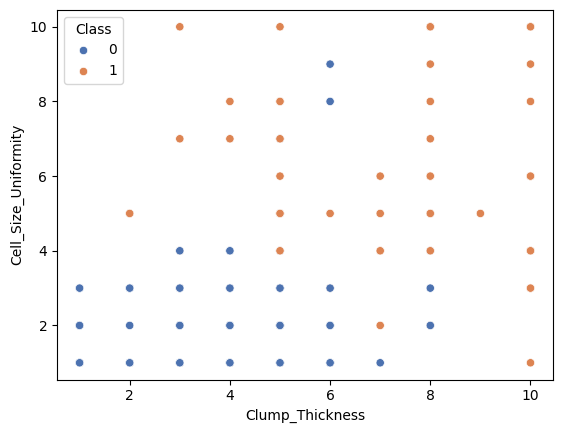

In [8]:
sns.scatterplot(x = X1['Clump_Thickness'], y = X1['Cell_Size_Uniformity'], hue = y1, palette = "deep")

#### Chosen Algorithm

For this assignment, we decided to use Support Vector Machines. [[more about SVM]](#svmsuport-vector-machines)

[[go back to the top]](#table-of-contents)

#### Algorithm implementation, with no changes 

First of all we need to get all we need from the past "mla" in the given GitHub link.

[[go back to the top]](#table-of-contents)

In [9]:
import logging

try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification

from metrics import accuracy
from kernels import Linear, RBF
from svm import SVM

logging.basicConfig(level=logging.DEBUG)


def classification():
    # Generate a random binary classification problem.
    X, y = make_classification(
        n_samples=1200, n_features=10, n_informative=5, random_state=1111, n_classes=2, class_sep=1.75
    )
    # Convert y to {-1, 1}
    y = (y * 2) - 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

    for kernel in [RBF(gamma=0.1), Linear()]:
        model = SVM(max_iter=10, kernel=kernel, C=0.6)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("Classification accuracy (%s): %s" % (kernel, accuracy(y_test, predictions)))

if __name__ == "__main__":
    classification()

INFO:root:Convergence has reached after 10.


Classification accuracy (RBF kernel): 0.975


INFO:root:Convergence has reached after 10.


Classification accuracy (Linear kernel): 0.7208333333333333


#### Algorithm implementation, with changes

[[go back to the top]](#table-of-contents)

### SVM(Suport Vector Machines)
yada yada yada